In [24]:
import os, pathlib, time
from datetime import timedelta

finished_files = pathlib.Path(r"D:\BEHAVIOR-1K\asset_pipeline").glob('cad/*/*/done-reflbake.success')
data = []
for ff in finished_files:
    fd = ff.parent
    bakery = fd / "bakery"
    baked_files = list(bakery.glob('*RawReflection*'))
    mtimes = [os.path.getmtime(bf) for bf in baked_files]

    # Get the duration of each object
    objs_in_bake_order = sorted(zip(baked_files, mtimes), key=lambda x: x[1])
    for i, (bf, mtime) in enumerate(objs_in_bake_order):
        if i == 0:
            continue
        prev_bf, prev_mtime = objs_in_bake_order[i - 1]
        duration = mtime - prev_mtime
        assert duration < 60 * 60, f"Duration longer than 1h for {bf} (prev: {prev_bf}, duration: {duration})"
        data.append({"file": str(fd.name), "object": str(bf.name), "duration": timedelta(seconds=duration)})

import pandas as pd
df = pd.DataFrame(data)

In [25]:
# Print file-level stats
df.groupby("file").agg({"duration": ["count", "mean", "min", "max", "sum"]}).sort_values(by=("duration", "mean"), ascending=False)

duration                                                   \
                   count                      mean                    min   
file                                                                        
legacy_batch-00      261 0 days 00:00:59.036645091 0 days 00:00:35.745203   
batch-02             230 0 days 00:00:45.673508369 0 days 00:00:30.418020   
legacy_batch-04      222 0 days 00:00:38.931085513 0 days 00:00:25.484379   
legacy_batch-05      201 0 days 00:00:29.383772263 0 days 00:00:19.090532   
batch-04             136 0 days 00:00:15.750819625 0 days 00:00:13.346730   
batch-07             158 0 days 00:00:14.898723006 0 days 00:00:09.959306   
legacy_batch-02      152 0 days 00:00:14.676403447 0 days 00:00:09.748802   
batch-12             143 0 days 00:00:13.486563342 0 days 00:00:09.849000   
batch-09             138 0 days 00:00:12.229995565 0 days 00:00:08.023629   
batch-00             145 0 days 00:00:12.053060158 0 days 00:00:07.976650   
batch-05             137 0 days 00:00:10.152410664 0 days 00:00:07.096181   
batch-10             128 0 days 00:00:10.024999398 0 days 00:00:06.594971   
batch-01             126 0 days 00:00:08.202923476 0 days 00:00:06.134846   
batch-11             117 0 days 00:00:08.169332512 0 days 00:00:05.375990   
batch-08             119 0 days 00:00:08.127064016 0 days 00:00:06.026037   
batch-06             122 0 days 00:00:07.403311147 0 days 00:00:05.501024   
batch-13              90 0 days 00:00:06.073374988 0 days 00:00:04.786353   
legacy_batch-01       99 0 days 00:00:05.196896363 0 days 00:00:04.103554   
batch-03             103 0 days 00:00:05.062887233 0 days 00:00:03.977424   
legacy_batch-03      184 0 days 00:00:04.698321146 0 days 00:00:03.261188   
custom-aa             14 0 days 00:00:01.878088214 0 days 00:00:01.724759   

                                                               
                                   max                    sum  
file                                                           
legacy_batch-00 0 days 00:01:48.575684 0 days 04:16:48.564369  
batch-02        0 days 00:00:59.977078 0 days 02:55:04.906925  
legacy_batch-04 0 days 00:00:52.972795 0 days 02:24:02.700984  
legacy_batch-05 0 days 00:03:19.446608 0 days 01:38:26.138225  
batch-04        0 days 00:00:22.437967 0 days 00:35:42.111469  
batch-07        0 days 00:00:23.591108 0 days 00:39:13.998235  
legacy_batch-02 0 days 00:00:20.509663 0 days 00:37:10.813324  
batch-12        0 days 00:00:17.502768 0 days 00:32:08.578558  
batch-09        0 days 00:00:56.403102 0 days 00:28:07.739388  
batch-00        0 days 00:01:03.025908 0 days 00:29:07.693723  
batch-05        0 days 00:00:59.935421 0 days 00:23:10.880261  
batch-10        0 days 00:00:53.507809 0 days 00:21:23.199923  
batch-01        0 days 00:00:14.825637 0 days 00:17:13.568358  
batch-11        0 days 00:01:16.226604 0 days 00:15:55.811904  
batch-08        0 days 00:00:23.790132 0 days 00:16:07.120618  
batch-06        0 days 00:00:10.151131 0 days 00:15:03.203960  
batch-13        0 days 00:00:14.839817 0 days 00:09:06.603749  
legacy_batch-01 0 days 00:00:10.749345 0 days 00:08:34.492740  
batch-03        0 days 00:00:11.826295 0 days 00:08:41.477385  
legacy_batch-03 0 days 00:00:08.193945 0 days 00:14:24.491091  
custom-aa       0 days 00:00:02.995231 0 days 00:00:26.293235

In [26]:
# Print general statistics of the durations
print(f"Mean duration: {df['duration'].mean()}")
print(f"Min duration: {df['duration'].min()}")
print(f"Max duration: {df['duration'].max()}") 

Mean duration: 0 days 00:00:20.350541627
Min duration: 0 days 00:00:01.724759
Max duration: 0 days 00:03:19.446608


TypeError: The DType <class 'numpy.dtype[timedelta64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[timedelta64]'>, <class 'numpy.dtype[float64]'>)

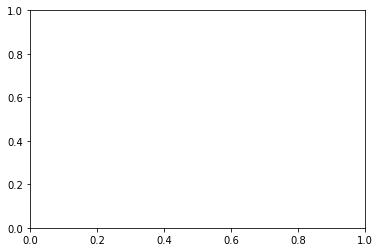

In [27]:
# Plot a histogram of the durations
import matplotlib.pyplot as plt
plt.hist(df['duration'], bins=50, edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Object Bake Durations')
plt.show()

In [ ]:
# What are the 10 worst offenders (longest bake times)?
worst_offenders = df.sort_values(by="duration", ascending=False).head(10)
print("Top 10 longest bake times:")
worst_offenders

Top 10 longest bake times:


,file,object,duration
1938,legacy_batch-00,bottom_cabinet-glefdh-0-link_1-base_link-R-low...,0 days 00:01:48.575684
2166,legacy_batch-00,bottle_of_pop-zxambx-0-base_link_VRayRawReflec...,0 days 00:01:22.149905
2162,legacy_batch-00,bottle_of_pop-wmqhul-0-base_link_VRayRawReflec...,0 days 00:01:20.292220
2165,legacy_batch-00,bottle_of_pop-xoldze-0-base_link_VRayRawReflec...,0 days 00:01:18.715290
2163,legacy_batch-00,bottle_of_pop-wrgmdt-0-base_link_VRayRawReflec...,0 days 00:01:18.666920
2164,legacy_batch-00,can_of_soda-xlyult-0-base_link_VRayRawReflecti...,0 days 00:01:18.427518
2161,legacy_batch-00,can_of_soda-vszbvb-0-base_link_VRayRawReflecti...,0 days 00:01:18.201339
2155,legacy_batch-00,bottle_of_pop-ribekf-0-base_link_VRayRawReflec...,0 days 00:01:18.131815
2159,legacy_batch-00,can_of_soda-uzbpnw-0-base_link_VRayRawReflecti...,0 days 00:01:17.985390
2160,legacy_batch-00,bottle_of_pop-vfjhav-0-base_link_VRayRawReflec...,0 days 00:01:17.716688
